<a href="https://colab.research.google.com/github/AdanMDG/IA-Metodos-de-clasific/blob/main/Redes%20Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Redes Neuronales
Desarrollo de una red neuronal para reconocimiento de imagenes.
Para ello, vamos a trabajar con un dataset provisto por keras: CIFAR10.
Este consta de 60000 imágenes en color de 32x32 en 10 clases, con 6000 imágenes por clase. Hay 50000 imágenes de entrenamiento y 10000 imágenes de prueba.
Cada imagen representa diferentes tipos de transportes o animales especificos detallados en la siguiente lista:

                                0. Airplane
                                1. Automobile
                                2. Bird
                                3. Cat
                                4. Beer
                                5. Dog
                                6. Frog
                                7. Horse
                                8. Ship
                                9. Truck

Los valores de los píxeles oscilan entre 0 y 255, indicando la luminosidad de estos(valores mas grandes indican mayor oscuridad).

Este dataset va a ser utilizado para reconocer ciertos objetos detallados anteriormente en imagenes, para esto, vamos a utilizar 3 redes neuronales con diferentes arquitecturas.

### Paso 1: Importamos librerías y cargar dataset
En primer lugar, vamos a importar todas las librerías que utilizaremos en este ejercicio, luego vamos a cargar en memoria el dataset, obteniendo el dataset de entrenamiento y el de testeo y, además, vamos a imprimir sus dimensiones.

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# Acá deben importar el dataset elegido en el caso de que esté en Keras
from tensorflow.keras.datasets import cifar10
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Cifar10 Dataset Shape:')
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

Cifar10 Dataset Shape:
X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


### Paso 2: Normalizamos el dataset
En este paso vamos a normalizar el dataset. Recordemos que los valores de los pixeles van entre 0-255, es por ello que para la normalización simplemente dividimos los dataset de entrenamiento y testeo por 255.

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

### Paso 3: Creamos el modelo en Keras
Vamos a comenzar creando el primer modelo en Keras muy simple:
- Como el dataset consiste de imagenes, debemos utilizar una layer Flatten para aplanar los datos
- Vamos a utilizar 3 layers ocultas con activación ReLU ya que son las mas rapidas y su funcionamiento final va a ser similar a las demas, con 40 y 20 neuronas.
- Luego agregamos una layer de salida con activación softmax, la cual tendrá 10 neuronas (una por cada tipo del dataset).

In [ ]:
#3 redes neuronales con diferente arquitectura. Es importante utilizar distinta cantidad de layers densas (fully connected) y de neuronas en cada una de ellas.

primer_modelo = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Paso 4: Compilamos el modelo
Para compilar el modelo utilizamos el optimizador Adam, la función de costo Sparse Categorical Cross Entropy y como metrica de evaluacion Accuracy.

In [ ]:
primer_modelo.compile(optimizer="adam",
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Paso 5: Entrenamos el modelo
Ahora que tenemos el modelo creado y compilado, lo que resta es ajustar el modelo a los datos, es decir, entrenar el modelo con el dataset de entrenamiento. Para ello usamos la función .fit() a la cual le pasamos como argumento el dataset de entrenamiento y la cantidad de epochs (cantidad de veces que el algoritmo va a abrir el dataset).

Probamos con 10 epochs para ver como se comporta

In [ ]:
primer_modelo.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.9982 - accuracy: 0.2571
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8211 - accuracy: 0.3345
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7708 - accuracy: 0.3585
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7370 - accuracy: 0.3736
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7194 - accuracy: 0.3813
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6994 - accuracy: 0.3861
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6869 - accuracy: 0.3907
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6737 - accuracy: 0.3965
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6698 - accuracy: 0.3973
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.658

En la primer Red Neuronal se observa que con 10 Epoch la precision converge en 40%, a continuacion probaremos con mas Epochs para ver si mejora.
Epochs de 20

In [ ]:
primer_modelo.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6545 - accuracy: 0.4031
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6481 - accuracy: 0.4031
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6428 - accuracy: 0.4084
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6410 - accuracy: 0.4075
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6313 - accuracy: 0.4116
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6315 - accuracy: 0.4101
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6276 - accuracy: 0.4119
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6200 - accuracy: 0.4132
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6190 - accuracy: 0.4163
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.612

Se observa un comportamiento similar ya que converge en 42%, vamos a probar por ultimo con un Epoch mas grande y si se comporta igual vamos a probar con otro modelo distinto.
Epoch = 100

In [ ]:
primer_modelo.fit(x_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5892 - accuracy: 0.4249
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5882 - accuracy: 0.4245
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5863 - accuracy: 0.4262
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5842 - accuracy: 0.4265
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5840 - accuracy: 0.4279
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5803 - accuracy: 0.4280
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5783 - accuracy: 0.4302
Epoch 8/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5794 - accuracy: 0.4296
Epoch 9/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5760 - accuracy: 0.4285
Epoch 10/100
1563/1563 [==============================] - 6s 4ms/step - l

Por ultimo, con un Epoch de 100 se observa un accuracy que converge en 44%,aumentando la precision minimamente comparado al ejemplo anterior, por lo tanto, intentamos con otro modelo.

#### **Probamos con modelos más complejos**

En el siguiente modelo se va a buscar trabajar con las mismas cantidades de layers pero aumentando las neuronas de cada una.

Se va a probar ahora con mas neuronas por layers:
  - 40 -> 160
  - 20 -> 60


In [ ]:
segundo_modelo = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])



segundo_modelo.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

segundo_modelo.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8706 - accuracy: 0.3248
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6950 - accuracy: 0.3930
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6260 - accuracy: 0.4185
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5825 - accuracy: 0.4349
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5454 - accuracy: 0.4442
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5173 - accuracy: 0.4574
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4980 - accuracy: 0.4674
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4786 - accuracy: 0.4729
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4552 - accuracy: 0.4816
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - l

En este modelo se observa una mejora en la precision, con un accuracy convergando en 48%.
Ahora se analizará con un Epoch mayor.

Epoch = 20

In [ ]:
segundo_modelo.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4292 - accuracy: 0.4893
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4132 - accuracy: 0.4939
Epoch 3/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4081 - accuracy: 0.4961
Epoch 4/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3988 - accuracy: 0.4991
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3856 - accuracy: 0.5027
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3761 - accuracy: 0.5058
Epoch 7/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3703 - accuracy: 0.5115
Epoch 8/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3636 - accuracy: 0.5101
Epoch 9/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3551 - accuracy: 0.5134
Epoch 10/20
1563/1563 [==============================] - 14s 9ms/step - l

Despues de aumentar los epochs se observa una mejora en la precision aumentando el accuracy en un 53%.
Esto nos da a entender que para mejorar la red neuronal debemos hacer mas grande el modelo, por lo tanto, intentaremos por ultima vez utilizar el segundo modelo con un epochs de 50 y despues crearemos un modelo mas grande.

In [ ]:
segundo_modelo.fit(x_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2923 - accuracy: 0.5378
Epoch 2/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2843 - accuracy: 0.5400
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2841 - accuracy: 0.5394
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2796 - accuracy: 0.5431
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2731 - accuracy: 0.5453
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2695 - accuracy: 0.5444
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2652 - accuracy: 0.5477
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2596 - accuracy: 0.5503
Epoch 9/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2579 - accuracy: 0.5497
Epoch 10/50
1563/1563 [==============================] - 14s 9ms/step - l

Como se observo en el primer modelo, en este caso tambien el aumento de epoch ayudo a que la precision aumente, pasando de un 53% a un 58%, pero sigue siendo bajo.
Por ultimo, como se observo en el modelo anterior, si aumentamos las neuronas el modelo mejora, por lo tanto, se diseño un tercer modelo con mas layers, pasaria de 2 con activacion ReLu a 5 con activacion ReLu y dejamos la de softmax.
Estas nuevas layers van a tener una cantidad de neuronas similar al ejemplo anterior ya que se observo que ese aumento de neuronas mejoro el modelo.

In [ ]:
tercer_modelo = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(164, activation='relu'),
    tf.keras.layers.Dense(124, activation='relu'),
    tf.keras.layers.Dense(86, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


tercer_modelo.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

tercer_modelo.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.9242 - accuracy: 0.2951
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7393 - accuracy: 0.3692
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6642 - accuracy: 0.4002
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6106 - accuracy: 0.4197
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5744 - accuracy: 0.4314
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5476 - accuracy: 0.4433
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5150 - accuracy: 0.4557
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4970 - accuracy: 0.4624
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4776 - accuracy: 0.4686
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

En este tercer modelo se observa que al aumentar las layers la precision no aumentó, al contrario, tuvo un minimo decaimiento por lo tanto, probaré con un epoch mayor y si se comporta igual cambiaré a un nuevo modelo.

In [ ]:
tercer_modelo.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4343 - accuracy: 0.4853
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4216 - accuracy: 0.4882
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4130 - accuracy: 0.4901
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4014 - accuracy: 0.4967
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3897 - accuracy: 0.4990
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3801 - accuracy: 0.5064
Epoch 7/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3756 - accuracy: 0.5049
Epoch 8/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3605 - accuracy: 0.5108
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3519 - accuracy: 0.5149
Epoch 10/20
1563/1563 [==============================] - 10s 6ms/step - l

Con el epoch de 20 se observa que el accuracy tuvo un aumento minimo, este converge en un 54% cuando en el segundo modelo fue en 53%, por lo tanto, no se justifica el aumento de layers, por ultimo vemos como se comporta con el epoch de 50.

In [ ]:
tercer_modelo.fit(x_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2674 - accuracy: 0.5439
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2618 - accuracy: 0.5459
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2583 - accuracy: 0.5469
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2499 - accuracy: 0.5463
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2432 - accuracy: 0.5518
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2416 - accuracy: 0.5521
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2418 - accuracy: 0.5526
Epoch 8/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2308 - accuracy: 0.5550
Epoch 9/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2264 - accuracy: 0.5596
Epoch 10/50
1563/1563 [==============================] - 12s 8ms/step - l

Como se observó utilizando 20 epochs no se justifica el aumento de layers ya que con 50 epoch pasa de un 58% a un 60% de precisión.

Por ultimo, voy a probar un modelo con mas neuronas que el tercero para ver si mejora considerablemente su precision y si justifica los costos computacionales que este conlleva.

In [ ]:
cuarto_modelo = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(896, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cuarto_modelo.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

cuarto_modelo.fit(x_train, y_train, epochs=10)


Con un epochs de 10 se observa un minimo aumento injustificable en el accuracy como para aplicar estos cambios pero, continuamos viendo como se comporta con mas epochs.
epochs = 20.

In [ ]:
cuarto_modelo.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3717 - accuracy: 0.5081
Epoch 2/20
1563/1563 [==============================] - 97s 62ms/step - loss: 1.3446 - accuracy: 0.5200
Epoch 3/20
1563/1563 [==============================] - 96s 62ms/step - loss: 1.3210 - accuracy: 0.5262
Epoch 4/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.3007 - accuracy: 0.5333
Epoch 5/20
1563/1563 [==============================] - 96s 61ms/step - loss: 1.2794 - accuracy: 0.5414
Epoch 6/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2555 - accuracy: 0.5469
Epoch 7/20
1563/1563 [==============================] - 96s 61ms/step - loss: 1.2261 - accuracy: 0.5584
Epoch 8/20
1563/1563 [==============================] - 94s 60ms/step - loss: 1.2107 - accuracy: 0.5630
Epoch 9/20
1563/1563 [==============================] - 96s 61ms/step - loss: 1.1849 - accuracy: 0.5712
Epoch 10/20
1563/1563 [==============================] - 95s 61m

Aqui se observa un aumento considerable para realizar estos cambios de arquitectura, por lo tanto, parece que el cambio necesario era el aumento de neuronas.
Por ultimo, probamos con epochs de 50.

In [ ]:
cuarto_modelo.fit(x_train, y_train, epochs=50)

Con 50 epochs se interpreta que al realizar mas ingresos a la red neuronal la precisión aumenta, como en este ejemplo que pasamos a un 86% de precisión, siendo la precisión mas alta conseguida hasta el momento.
Por ultimo, voy a probar con un modelo con menos layers y otro con un aumento de layers considerable pero con pocas neuronas, para asi, concluir con lo dicho anteriormente.

In [ ]:
quinto_modelo = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(896, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

quinto_modelo.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

quinto_modelo.fit(x_train, y_train, epochs=50)


Epoch 1/50
1563/1563 [==============================] - 48s 30ms/step - loss: 1.8662 - accuracy: 0.3284
Epoch 2/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6682 - accuracy: 0.4003
Epoch 3/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5932 - accuracy: 0.4267
Epoch 4/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5400 - accuracy: 0.4498
Epoch 5/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5078 - accuracy: 0.4562
Epoch 6/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4804 - accuracy: 0.4695
Epoch 7/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4567 - accuracy: 0.4785
Epoch 8/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4367 - accuracy: 0.4845
Epoch 9/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4164 - accuracy: 0.4921
Epoch 10/50
1563/1563 [==============================] - 47s 30m

Aqui se observa que al disminuir las layers el modelo disminuye su eficiencia un 20%.

In [ ]:
sexto_modelo = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(164, activation='relu'),
    tf.keras.layers.Dense(124, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(43, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

sexto_modelo.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

sexto_modelo.fit(x_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 12s 6ms/step - loss: 2.0353 - accuracy: 0.2261
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8369 - accuracy: 0.3211
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7685 - accuracy: 0.3529
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7125 - accuracy: 0.3761
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6624 - accuracy: 0.3989
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6306 - accuracy: 0.4105
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5955 - accuracy: 0.4245
Epoch 8/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5751 - accuracy: 0.4345
Epoch 9/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5582 - accuracy: 0.4384
Epoch 10/50
1563/1563 [==============================] - 10s 6ms/step - l

Como habiamos analizado anteriormente, el mejor modelo obtenido fue el que  mayor numero de neuronal contenia. El tener gran cantidad de layers no genero un aumento de la precision considerable como para generar ese gasto computacional, por lo tanto, el modelo mas optimo para este dataset seria el siguiente:

    cuarto_modelo = tf.keras.models.Sequential([

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dense(896, activation='relu'),
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
          ])

# 2) Implementacion de CNN
Primero vemos las dimensiones de las imagenes



In [ ]:
x_train[0].shape

(32, 32, 3)

Continuamos cambiandoles el tamaño con la funcion reshape.

In [ ]:
x_train = x_train.reshape(50000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)

Ya modificados los tamaños de las imagenes realizamos la extracion de los feature.
Esto va a realizarse utilizando, para cada imagen leida, 3 layers, cada una compuesta por una red Convolucional con una funcion de activacion ReLu para filtrar la imagen para un feature particular y detectar ese feature dentro de la imagen filtrada, y una Max Pooling para reducir el tamaño y compactar la informacion recibida en la entrada.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Creamos el modelo
modelo_1 = Sequential();

#Agregamos las layers

modelo_1.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
modelo_1.add(MaxPooling2D(pool_size=2))
modelo_1.add(Conv2D(64, kernel_size=3, activation='relu'))
modelo_1.add(MaxPooling2D(pool_size=2))
modelo_1.add(Conv2D(32, kernel_size=3, activation='relu'))
modelo_1.add(MaxPooling2D(pool_size=2))


Tambien utilizaremos las layers que obtuvimos en el inciso 1, ya que son capaces de detectar otro tipo de feature y de realizar la clasificacion.

In [ ]:
modelo_1.add(Flatten())
modelo_1.add(Dense(1024, activation='relu')),
modelo_1.add(Dense(896, activation='relu')),
modelo_1.add(Dense(512, activation='relu')),
modelo_1.add(Dense(256, activation='relu')),
modelo_1.add(Dense(128, activation='relu')),
modelo_1.add(Dense(10, activation='softmax'))

Ahora seguimos el procedimiento que hicimos anteriormente, compilamos y entrenamos.

In [ ]:
modelo_1.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

modelo_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1563/1563 [==============================] - 240s 153ms/step - loss: 1.2090 - accuracy: 0.5691 - val_loss: 1.1951 - val_accuracy: 0.5742
Epoch 2/3
1563/1563 [==============================] - 230s 147ms/step - loss: 1.1166 - accuracy: 0.6045 - val_loss: 1.1178 - val_accuracy: 0.6042
Epoch 3/3
1563/1563 [==============================] - 229s 147ms/step - loss: 1.0379 - accuracy: 0.6337 - val_loss: 1.1301 - val_accuracy: 0.6202


En este primero modelo de observa un accuracy que ronda entre 56% y 63%, probaremos con 5 epochs para ver si aumenta.

In [ ]:
modelo_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 228s 145ms/step - loss: 0.5809 - accuracy: 0.7946 - val_loss: 1.0613 - val_accuracy: 0.6743
Epoch 2/5
1563/1563 [==============================] - 227s 145ms/step - loss: 0.5317 - accuracy: 0.8120 - val_loss: 1.0915 - val_accuracy: 0.6604
Epoch 3/5
1563/1563 [==============================] - 225s 144ms/step - loss: 0.4961 - accuracy: 0.8233 - val_loss: 1.2078 - val_accuracy: 0.6624
Epoch 4/5
1563/1563 [==============================] - 227s 145ms/step - loss: 0.4522 - accuracy: 0.8410 - val_loss: 1.1090 - val_accuracy: 0.6773
Epoch 5/5
1563/1563 [==============================] - 228s 146ms/step - loss: 0.4092 - accuracy: 0.8548 - val_loss: 1.2843 - val_accuracy: 0.6608


Con 5 epochs se observa que el accuracy converge en 85%, por lo tanto, se puede deducir que al tener tantas neuronas y filtros 3 epochs eran pocos ingresos a la red como para poder calcular bien su accuracy, ahora probaremos con 10.

In [ ]:
modelo_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 229s 146ms/step - loss: 0.3842 - accuracy: 0.8672 - val_loss: 1.3004 - val_accuracy: 0.6745
Epoch 2/10
1563/1563 [==============================] - 226s 145ms/step - loss: 0.3459 - accuracy: 0.8799 - val_loss: 1.4439 - val_accuracy: 0.6623
Epoch 3/10
1563/1563 [==============================] - 238s 152ms/step - loss: 0.3377 - accuracy: 0.8821 - val_loss: 1.4004 - val_accuracy: 0.6617
Epoch 4/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.3075 - accuracy: 0.8924 - val_loss: 1.3642 - val_accuracy: 0.6715
Epoch 5/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.2795 - accuracy: 0.9032 - val_loss: 1.4080 - val_accuracy: 0.6653
Epoch 6/10
1563/1563 [==============================] - 225s 144ms/step - loss: 0.2743 - accuracy: 0.9047 - val_loss: 1.4729 - val_accuracy: 0.6615
Epoch 7/10
1563/1563 [==============================] - 226s 145ms/step - loss: 0.2470 - accuracy: 0.9164 - val_

Como comente anteriormente, con 10 epochs se concluye que a mas neuronas y filtros es necesario mas epochs para poder analizar la eficiencia del modelo planteado correctamente.

# Segundo modelo CNN


En este segundo modelo lo que se busco es mantener las layers del ejercicios 1 ya que fueron las mas optimas y le modificamos a las capas convolucionales la cantidad de filtros aplicados.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Creamos el modelo
modelo_2 = Sequential();

#Agregamos las layers

modelo_2.add(Conv2D(460, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
modelo_2.add(MaxPooling2D(pool_size=2))
modelo_2.add(Conv2D(264, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
modelo_2.add(MaxPooling2D(pool_size=2))
modelo_2.add(Conv2D(132, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
modelo_2.add(MaxPooling2D(pool_size=2))
modelo_2.add(Flatten())
modelo_2.add(Dense(1024, activation='relu')),
modelo_2.add(Dense(896, activation='relu')),
modelo_2.add(Dense(512, activation='relu')),
modelo_2.add(Dense(256, activation='relu')),
modelo_2.add(Dense(128, activation='relu')),
modelo_2.add(Dense(10, activation='softmax'))

modelo_2.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

modelo_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)



Epoch 1/3
1563/1563 [==============================] - 1074s 686ms/step - loss: 1.7128 - accuracy: 0.3474 - val_loss: 1.4222 - val_accuracy: 0.4786
Epoch 2/3
1563/1563 [==============================] - 1069s 684ms/step - loss: 1.2843 - accuracy: 0.5387 - val_loss: 1.1855 - val_accuracy: 0.5770
Epoch 3/3
1563/1563 [==============================] - 1071s 685ms/step - loss: 1.1025 - accuracy: 0.6125 - val_loss: 1.1248 - val_accuracy: 0.6122


En comparación al ejemplo anterior, este comdelo con 3 epochs varia mucho su accuracy, por lo tanto, probamos con 5 y 10

In [ ]:
modelo_2.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

modelo_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 1522s 973ms/step - loss: 0.9713 - accuracy: 0.6617 - val_loss: 1.0665 - val_accuracy: 0.6355
Epoch 2/5
1563/1563 [==============================] - 1489s 953ms/step - loss: 0.8743 - accuracy: 0.6959 - val_loss: 1.0442 - val_accuracy: 0.6325
Epoch 3/5
1563/1563 [==============================] - 1490s 953ms/step - loss: 0.7937 - accuracy: 0.7252 - val_loss: 0.9519 - val_accuracy: 0.6816
Epoch 4/5
1563/1563 [==============================] - 1483s 949ms/step - loss: 0.7271 - accuracy: 0.7468 - val_loss: 0.9722 - val_accuracy: 0.6747
Epoch 5/5
1563/1563 [==============================] - 1486s 951ms/step - loss: 0.6698 - accuracy: 0.7667 - val_loss: 0.9068 - val_accuracy: 0.6985


Con 5 epochs se nota valores mas cercanos pero menores al ejemplo anterior.

In [ ]:
modelo_2.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

modelo_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 1083s 692ms/step - loss: 0.9905 - accuracy: 0.6537 - val_loss: 1.0474 - val_accuracy: 0.6486
Epoch 2/10
1563/1563 [==============================] - 1073s 687ms/step - loss: 0.9082 - accuracy: 0.6857 - val_loss: 0.9788 - val_accuracy: 0.6616
Epoch 3/10
1563/1563 [==============================] - 1068s 684ms/step - loss: 0.8382 - accuracy: 0.7085 - val_loss: 0.9784 - val_accuracy: 0.6757
Epoch 4/10
1563/1563 [==============================] - 1066s 682ms/step - loss: 0.7765 - accuracy: 0.7311 - val_loss: 0.9250 - val_accuracy: 0.6900
Epoch 5/10
1563/1563 [==============================] - 1069s 684ms/step - loss: 0.7239 - accuracy: 0.7491 - val_loss: 0.9703 - val_accuracy: 0.6746
Epoch 6/10
1563/1563 [==============================] - 1096s 701ms/step - loss: 0.6744 - accuracy: 0.7653 - val_loss: 1.0110 - val_accuracy: 0.6805
Epoch 7/10
1563/1563 [==============================] - 1071s 686ms/step - loss: 0.6206 - accuracy: 0.7838

Aqui se observa que el 2do modelo tiene un  accuracy del 83%, siendo menor que el 92% del primer modelo CNN.
Ahora, haremos un 3er modelo para seguir analizando diferentes arquitecturas.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Creamos el modelo
modelo_3 = Sequential();

#Agregamos las layers

modelo_3.add(Conv2D(24, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
modelo_3.add(MaxPooling2D(pool_size=2))
modelo_3.add(Conv2D(20, kernel_size=3, activation='relu'))
modelo_3.add(MaxPooling2D(pool_size=2))
modelo_3.add(Conv2D(18, kernel_size=3, activation='relu'))
modelo_3.add(MaxPooling2D(pool_size=2))
modelo_3.add(Flatten())
modelo_3.add(Dense(1024, activation='relu')),
modelo_3.add(Dense(896, activation='relu')),
modelo_3.add(Dense(512, activation='relu')),
modelo_3.add(Dense(256, activation='relu')),
modelo_3.add(Dense(128, activation='relu')),
modelo_3.add(Dense(10, activation='softmax'))


In [ ]:
modelo_3.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

modelo_3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

modelo_3.summary()

Epoch 1/3
1563/1563 [==============================] - 97s 61ms/step - loss: 1.8271 - accuracy: 0.2834 - val_loss: 1.6336 - val_accuracy: 0.3894
Epoch 2/3
1563/1563 [==============================] - 90s 58ms/step - loss: 1.5578 - accuracy: 0.4168 - val_loss: 1.4846 - val_accuracy: 0.4462
Epoch 3/3
1563/1563 [==============================] - 91s 59ms/step - loss: 1.4232 - accuracy: 0.4780 - val_loss: 1.3821 - val_accuracy: 0.4980
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 30, 30, 24)        672       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 13, 13, 12)        2604      
              

In [ ]:
modelo_3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.6197 - accuracy: 0.3930 - val_loss: 1.4840 - val_accuracy: 0.4466
Epoch 2/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4585 - accuracy: 0.4643 - val_loss: 1.4541 - val_accuracy: 0.4742
Epoch 3/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.3648 - accuracy: 0.5047 - val_loss: 1.3641 - val_accuracy: 0.5001
Epoch 4/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.3078 - accuracy: 0.5286 - val_loss: 1.3086 - val_accuracy: 0.5353
Epoch 5/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2587 - accuracy: 0.5478 - val_loss: 1.2830 - val_accuracy: 0.5420
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 24)        672       
                                                         

In [ ]:
modelo_3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 47s 29ms/step - loss: 1.2105 - accuracy: 0.5690 - val_loss: 1.2140 - val_accuracy: 0.5639
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1706 - accuracy: 0.5806 - val_loss: 1.2280 - val_accuracy: 0.5652
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1424 - accuracy: 0.5913 - val_loss: 1.2046 - val_accuracy: 0.5754
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1086 - accuracy: 0.6034 - val_loss: 1.1633 - val_accuracy: 0.5861
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0784 - accuracy: 0.6165 - val_loss: 1.1731 - val_accuracy: 0.5849
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0489 - accuracy: 0.6278 - val_loss: 1.1498 - val_accuracy: 0.5912
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0204 - accuracy: 0.6345 - val_loss: 1.1496 -

Nuevamente no se observa un aumento del accuracy al primer modelo, por lo tanto concluimos que el modelo 1 es posiblemente una buena arquitectura para este tipo de dataset.

# COMPARAR RENDIMIENTO CON OTRO DATASET
A continuacion, probaré el rendmiento de la mejor arquitectura obtenida anteriormente en otro dataset para analizar su rendimiento en otros ejemplos.

Cifar10 Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


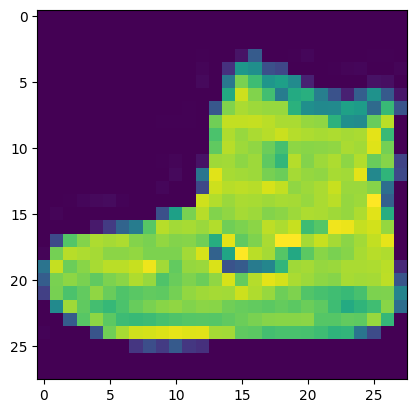

In [ ]:
import tensorflow as tf
from keras.losses import SparseCategoricalCrossentropy
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
plt.imshow(x_train[0])
print('Cifar10 Dataset Shape:')
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))
x_train[0].shape
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28,1)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Creamos el modelo
modelo_N = Sequential()

#Agregamos las layers

modelo_N.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(28,28,1)))
modelo_N.add(MaxPooling2D(pool_size=2))
modelo_N.add(Conv2D(64, kernel_size=3, activation='relu'))
modelo_N.add(MaxPooling2D(pool_size=2))
modelo_N.add(Conv2D(32, kernel_size=3, activation='relu'))
modelo_N.add(MaxPooling2D(pool_size=2))
modelo_N.add(Flatten())
modelo_N.add(Dense(1024, activation='relu')),
modelo_N.add(Dense(896, activation='relu')),
modelo_N.add(Dense(512, activation='relu')),
modelo_N.add(Dense(256, activation='relu')),
modelo_N.add(Dense(128, activation='relu')),
modelo_N.add(Dense(10, activation='softmax'))

modelo_N.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

modelo_N.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.6318 - accuracy: 0.7707 - val_loss: 0.5324 - val_accuracy: 0.8084
Epoch 2/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.4693 - accuracy: 0.8311 - val_loss: 0.4671 - val_accuracy: 0.8300
Epoch 3/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.4185 - accuracy: 0.8496 - val_loss: 0.4071 - val_accuracy: 0.8545
Epoch 4/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.3848 - accuracy: 0.8604 - val_loss: 0.4390 - val_accuracy: 0.8484
Epoch 5/10
1875/1875 [==============================] - 138s 73ms/step - loss: 0.3642 - accuracy: 0.8680 - val_loss: 0.3941 - val_accuracy: 0.8575
Epoch 6/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.3414 - accuracy: 0.8752 - val_loss: 0.4059 - val_accuracy: 0.8603
Epoch 7/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.3301 - accuracy: 0.8808 - val_loss: 0

# CONCLUSIÓN
Observando los resultados obtenidos se puede concluir que, al realizar las arquitecturas de las redes neuronales los mejores resultados fueron obtenidos en funcion al aumento de neuronal y no tanto al aumento de layers, al tener gran cantidad de layers no se genero un aumento de la precision considerable como para generar ese gasto computacional.

Despues, en los Modelos CNN, como estos son una mejora de las arquitecturas anteriormente evaluadas, lo que se analizo es su eficiencia y si vale la pena implementarla considerando su gran costo computacional. Aqui se concluyó que hubo un aumento considerable llegando al 92%, siendo este suficientemente superior al 82% obtenido anteriormente, por lo tanto, se puede aceptar el costo computacional que conlleva utilizarlo, este funciona de una manera similar a las redes neuronales, cuanto mas neuronas por layers mejor rendimiento y mayor costo computacional obtenemos.

Por ultimo, se evaluo el modelo con otro dataset para analizar el Overfitting y se concluyó que, es un buen modelo en general, ya que, cambiando de dataset obtuvimos una precision del 83%, eso quiere decir que no existe Overfitting y que este Modelo CNN es bueno y se puede utilizar en diferentes dataset.
